In [1]:
import cv2
import pytesseract
from pytesseract import Output
import re
from PIL import Image

In [2]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binarized = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return binarized


def extract_boxes_with_ocr(image):
    print("🔍 Running OCR with bounding boxes...")
    return pytesseract.image_to_data(image, output_type=Output.DICT, lang="deu")


def extract_price_blocks(ocr_data):
    results = []
    num_boxes = len(ocr_data["text"])

    for i in range(num_boxes):
        word = ocr_data["text"][i].strip()
        conf = int(ocr_data["conf"][i])

        if conf < 40 or not word:
            continue

        # Detect price-like string (e.g., 1,99 or 2.49)
        if re.match(r"^\d+[,.]\d{2}$", word):
            x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

            # Search nearby words for product title
            product_words = []
            for j in range(num_boxes):
                if abs(ocr_data["top"][j] - y) < 100 and ocr_data["left"][j] < x - 50:
                    product_words.append(ocr_data["text"][j].strip())

            results.append(
                {
                    "product": " ".join(product_words).strip(),
                    "price": float(word.replace(",", ".")),
                    "bbox": [x, y, x + w, y + h],
                }
            )

    return results


# Run the full thing
def process_flyer_classically(image_path):
    image = preprocess_image(image_path)
    ocr_data = extract_boxes_with_ocr(image)
    products = extract_price_blocks(ocr_data)

    print("\n✅ Extracted Items:")
    for p in products:
        print(p)

In [3]:
image_path = "/app/crawler/wip/data/Aldi_ex1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# binarized = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

(1062, 602)


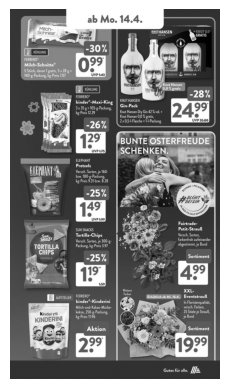

In [4]:
import matplotlib.pyplot as plt

print(image.shape)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [5]:
image_ocr = pytesseract.image_to_data(image, output_type=Output.DICT, lang="deu")

TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/5/tessdata/deu.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'deu\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [7]:
pytesseract.image_to_data

<function pytesseract.pytesseract.image_to_data(image, lang=None, config='', nice=0, output_type='string', timeout=0, pandas_config=None)>